# CNN-Based Breast Cancer Classification and Evaluation

## Importing Libraries

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import numpy as np
import pandas as pd

## Data Preprocessing  
- splitting data into training and validation sets

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory("Dataset2\FNA",
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory("Dataset2\FNA",
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='validation')

test_set = test_datagen.flow_from_directory("Dataset2/test",
                                            target_size = (50, 50),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 1380 images belonging to 2 classes.


Found 344 images belonging to 2 classes.
Found 14 images belonging to 1 classes.


## Initializing Model and Fitting

In [3]:
# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (50, 50, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Full connection
classifier.add(Dense(activation = 'relu', units=128))
classifier.add(Dense(activation = 'sigmoid', units=1))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the CNN to the images
history1 = classifier.fit_generator(training_set,
                         validation_data = validation_set, epochs = 25)

Epoch 1/25


C:\Users\Ayush\AppData\Local\Temp\ipykernel_20732\2980701239.py:25: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = classifier.fit_generator(training_set,


44/44 [==============================] - 4s 65ms/step - loss: 0.6156 - accuracy: 0.6159 - val_loss: 0.6324 - val_accuracy: 0.6221
Epoch 2/25
44/44 [==============================] - 3s 66ms/step - loss: 0.4596 - accuracy: 0.7855 - val_loss: 0.6123 - val_accuracy: 0.6890
Epoch 3/25
44/44 [==============================] - 3s 61ms/step - loss: 0.3348 - accuracy: 0.8833 - val_loss: 0.6362 - val_accuracy: 0.6686
Epoch 4/25
44/44 [==============================] - 2s 55ms/step - loss: 0.3251 - accuracy: 0.8877 - val_loss: 0.7334 - val_accuracy: 0.6250
Epoch 5/25
44/44 [==============================] - 2s 52ms/step - loss: 0.3124 - accuracy: 0.8884 - val_loss: 0.7499 - val_accuracy: 0.6192
Epoch 6/25
44/44 [==============================] - 2s 53ms/step - loss: 0.3052 - accuracy: 0.8855 - val_loss: 0.5947 - val_accuracy: 0.7965
Epoch 7/25
44/44 [==============================] - 2s 51ms/step - loss: 0.3221 - accuracy: 0.8891 - val_loss: 0.6332 - val_accuracy: 0.6948
Epoch 8/25
44/44 [======

## Plotting Losses and Accuracy

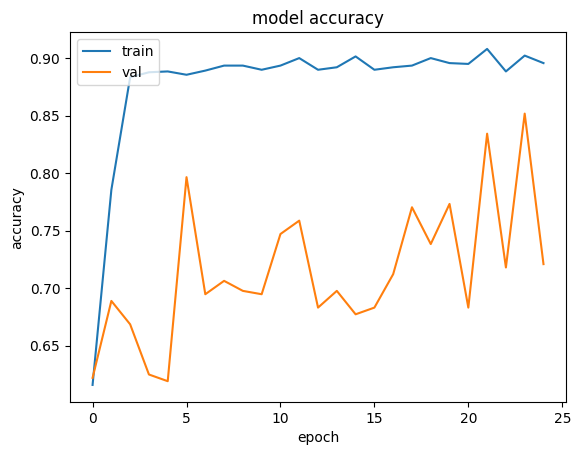

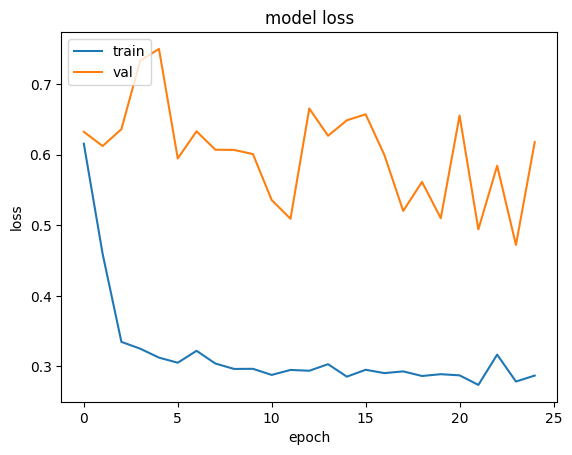

In [4]:
import matplotlib.pyplot as plt 

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Predicting on Test Set

In [5]:
pred = classifier.predict_generator(test_set, steps=len(test_set), verbose=1)
# Get classes by np.round
cl = np.round(pred)
# Get filenames (set shuffle=false in generator is important)
filenames=test_set.filenames
# Data frame
results=pd.DataFrame({"file":filenames,"pr":pred[:,0], "class":cl[:,0]})
results

C:\Users\Ayush\AppData\Local\Temp\ipykernel_20732\2634479007.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = classifier.predict_generator(test_set, steps=len(test_set), verbose=1)


1/1 [==============================] - 0s 166ms/step


,file,pr,class
0,all_classes\eight.png,0.974224,1.0
1,all_classes\eleven.png,0.978634,1.0
2,all_classes\five.png,0.930601,1.0
3,all_classes\four.png,0.942679,1.0
4,all_classes\fourteen.png,0.982932,1.0
5,all_classes\nine.png,0.845154,1.0
6,all_classes\one.png,0.070530,0.0
7,all_classes\seven.png,0.573202,1.0
8,all_classes\six.png,0.058222,0.0
9,all_classes\ten.png,0.723579,1.0


In [6]:
# Loss and Accuracy on final epoch
training_loss = history1.history['loss'][-1]
validation_loss = history1.history['val_loss'][-1]
training_accuracy = history1.history['accuracy'][-1]
validation_accuracy = history1.history['val_accuracy'][-1]
print("Training Loss: {:.4f}".format(training_loss), "Validation Loss: {:.4f}".format(validation_loss), "Training Accuracy: {:.4f}".format(training_accuracy), "Validation Accuracy: {:.4f}".format(validation_accuracy), sep='\n')

Training Loss: 0.2870
Validation Loss: 0.6179
Training Accuracy: 0.8957
Validation Accuracy: 0.7209


# Summary

In this project, the Convolutional Neural Network (CNN) was employed for breast cancer classification using labeled FNA images within 'Dataset2.' The dataset underwent preprocessing to optimize model training and validation.  

Results:  

    Training Loss: 0.2870
    Validation Loss: 0.6179
    Training Accuracy: 0.8957
    Validation Accuracy: 0.7209

The model's predictions for malignancy are represented as follows:  

    Predicted Malignant (1): 10
    Predicted Benign (0): 4
    
These results provide a comprehensive overview of the CNN's performance in breast cancer classification, with 0 indicating benign and 1 indicating malignant predictions.